# Exploratory Data Analysis

In [34]:
# import libraries
import os
import random
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns   
from music21 import *
from IPython.display import Audio
from intervaltree import Interval,IntervalTree
from collections import Counter
import librosa
import librosa.display
from wordcloud import WordCloud
from IPython.display import Image
from pandas.plotting import scatter_matrix

## Exploration of npz data

- The npz dataset is 11 gigabytes and is too large to upload to github. We uploaded it to google drive and  mounted the data on a Google Collab notebook in order to extract the data features. 

- The raw file location references the google drive file locations. 

In [ ]:
#Import npz data
mn_data = np.load('/content/drive/My Drive/w207_dataset/musicnet.npz','rb',encoding='latin1', allow_pickle=True)

print('Number of recordings: ' + str(len(mn_data.files)))
print('Example MusicNet ids: ' + str(list(mn_data.keys())[0:5]))

#### Output of print statement for first 5 music files

Number of recordings: 330

Example MusicNet ids: ['1788', '1789', '2659', '2127', '1818']

In [ ]:
X,Y = mn_data['1788'] # data X and labels Y for recording id 1788
print(type(X))
print(type(Y))

#### Output of print statement 

<class 'numpy.ndarray'>

<class 'intervaltree.intervaltree.IntervalTree'>

#### Try to plot spectogram of the song 1788

In [ ]:
fs = 44100      # samples/second
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(2)
plt.plot(X[0:30*fs],color=(41/255.,104/255.,168/255.))
fig.axes[0].set_xlim([0,30*fs])
fig.axes[0].set_xlabel('sample (44,100Hz)')
fig.axes[0].set_ylabel('amplitude')

#### Output of plot

Plot of Spectro Data for Music


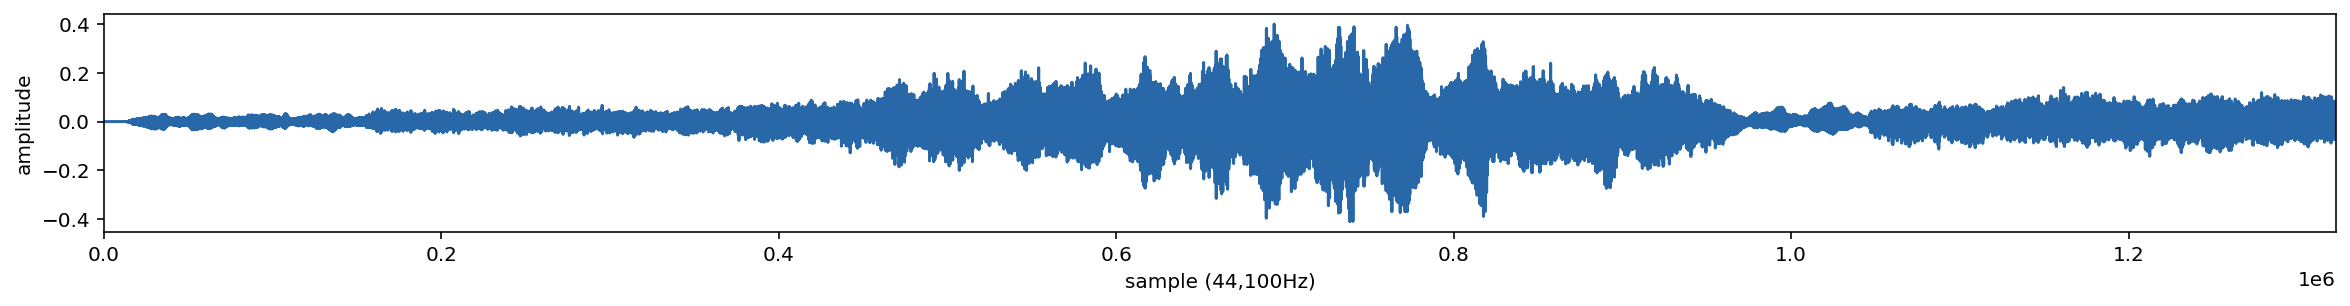

In [7]:
from IPython.display import Image
print('Plot of Spectro Data for Music File ID 1788')
Image(filename='../data/plot1.png', width=1200)

## Exploration of individual WAV files

The WAV dataset is 10 gigabytes and is too large to upload to github. We uploaded it to google drive and mounted the data on a Google Collab notebook in order to extract the data features.

The raw file location references the google drive file locations.

#### Plot Spectogram Energy Map for song 1759 for comparison

In [ ]:
audio_path = '/content/drive/My Drive/w207_dataset/test_data/1759.wav'

#load the wav file as a floating point time series at the given sample rate (same as fs above). Since we do not use 'sr=None' which would keep the native sample rate of the clip,
#the clip is loaded at the default sample rate of 22,050 samples/second.
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

#### Output of print statement

<class 'numpy.ndarray'> <class 'int'>

(4292352,) 22050

In [ ]:
plt.figure(figsize=(14, 5))

#Amplitude Plot - loudness of sound
librosa.display.waveplot(x, sr=sr)

#### Output of amplitude plot for song 1759


Plot of Spectro Data for Music File 1759


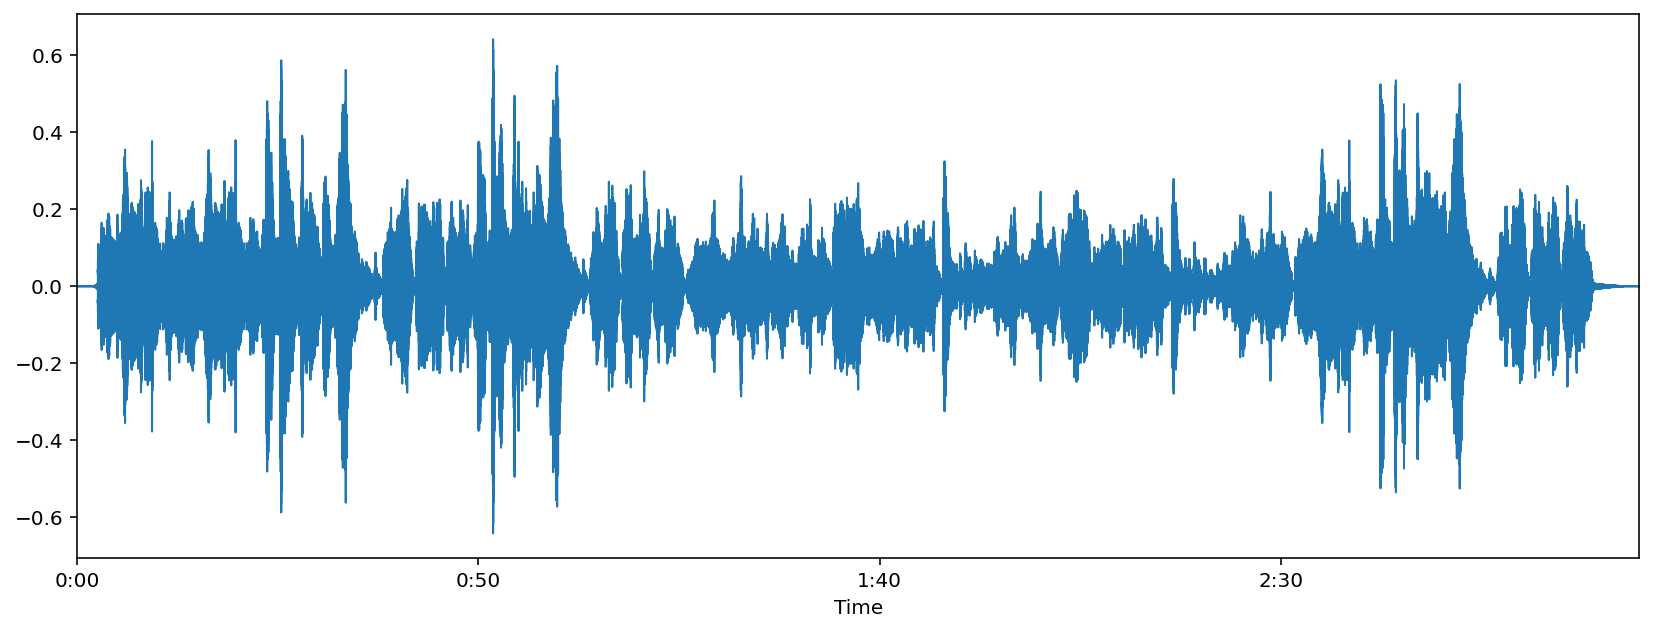

In [8]:
from IPython.display import Image
print('Plot of Spectro Data for Music File 1759')
Image(filename='../data/plot2.png', width=1200)

In [ ]:
#Spectrogram Plot Based on Color Map
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#### Output of decibels plot for song 1759

Plot of Sound in Decibels for Music File 1759


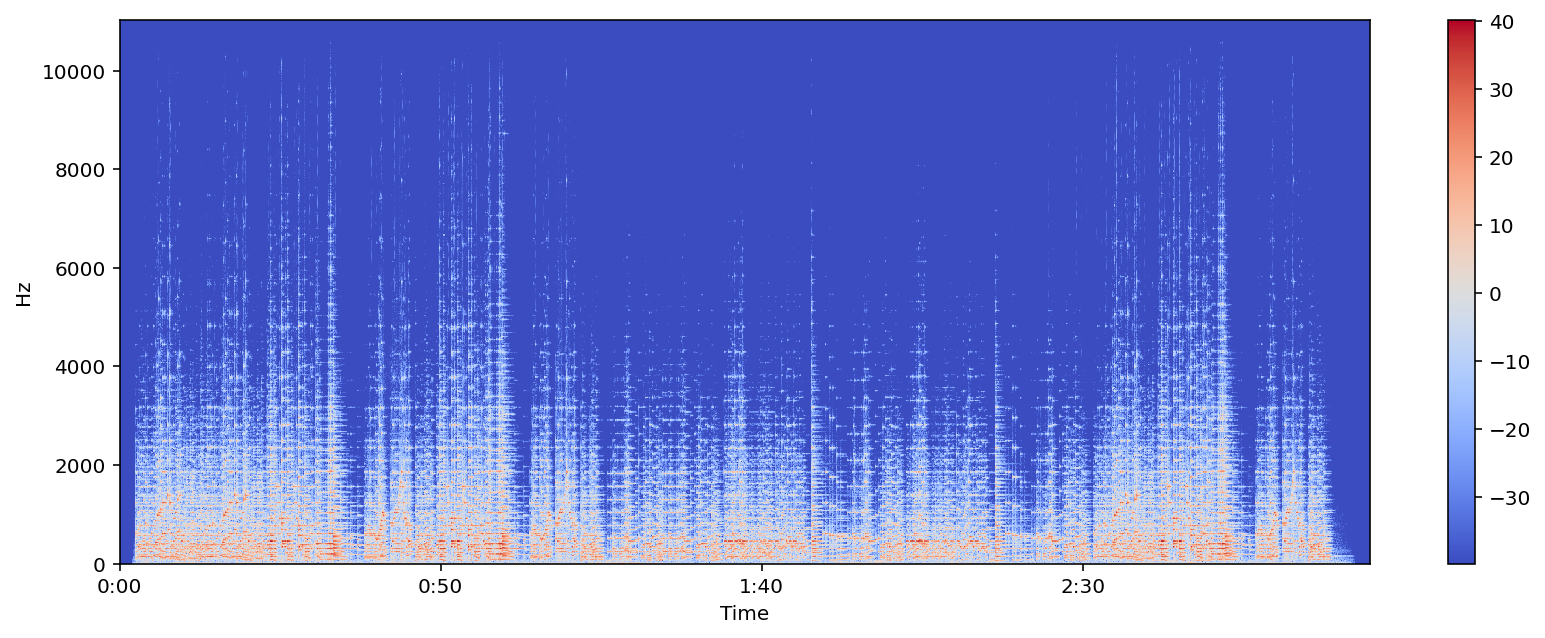

In [9]:
from IPython.display import Image
print('Plot of Sound in Decibels for Music File 1759')
Image(filename='../data/plot3.png', width=1200)

### Review Harmonic and Percussive Components of Music File ID 1727

In [ ]:
#define the file path
file_1727= '/content/drive/My Drive/w207_dataset/train_data/1727.wav'

#load the waveform y and sampling rate s
y, sr = librosa.load(file_1727, sr=None)
# To preserve the native sampling rate of the file, use sr=None

#decompose wave file into harmonic and percussive components of the music
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [ ]:
#Plot the amplitude envelope of the harmonic and percussive waveform

librosa.display.waveplot(y_harmonic, sr=sr, color= 'blue',alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()

Harmonic and Percussive Sound for Music File 1727


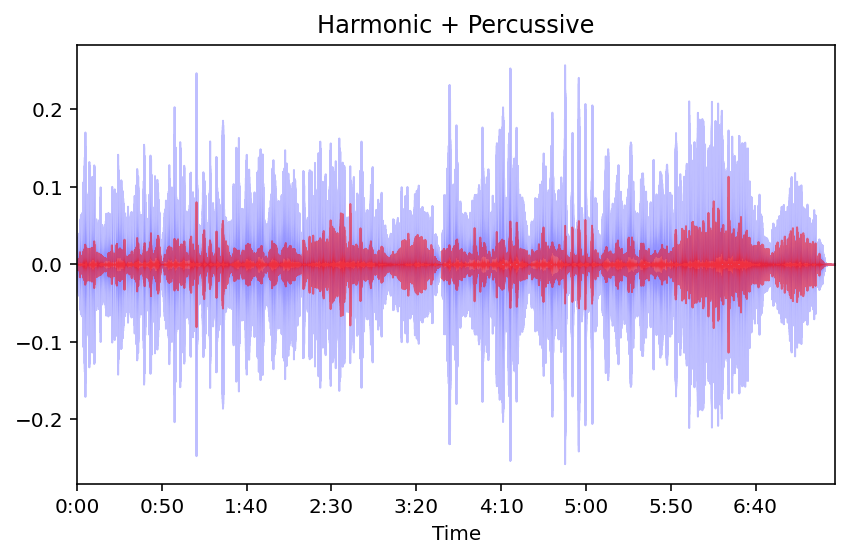

In [22]:
from IPython.display import Image
print('Harmonic and Percussive Sound for Music File 1727')
Image(filename='../data/plot4.png', width=600)

In [ ]:
# Compute chroma features from the signal  - https://librosa.org/doc/main/auto_examples/plot_display.html
#chromagram shows the pitch
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

Chromagram for Music File 1727


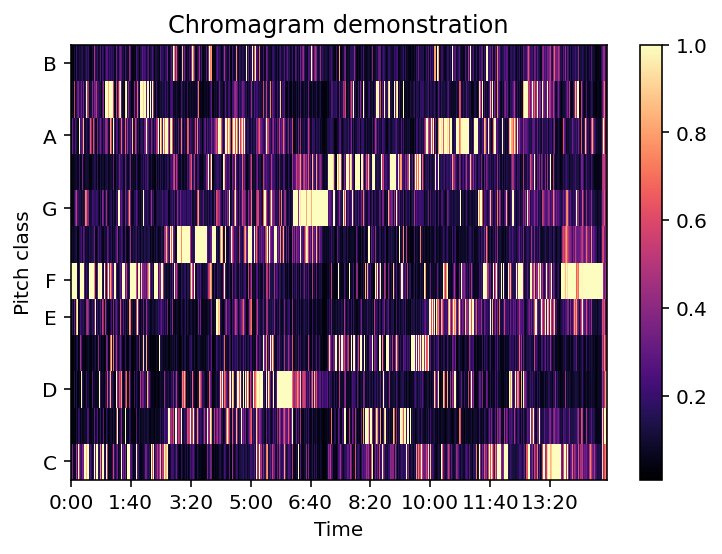

In [23]:
from IPython.display import Image
print('Chromagram for Music File 1727')
Image(filename='../data/plot5.png', width=600)

In [ ]:
#Short-time Fourier transform, and then mapping the magnitudes to a decibel scale.

#Show spectro-temporal data
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Decibels over Time for Music File 1727


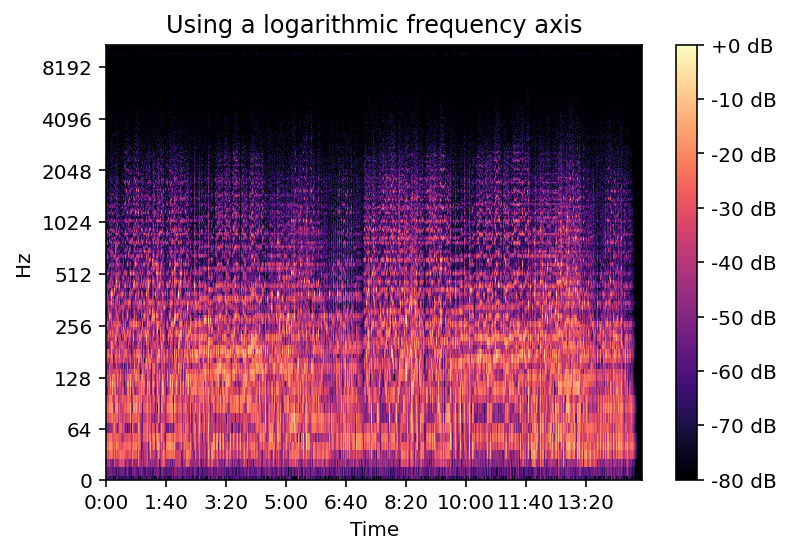

In [24]:
from IPython.display import Image
print('Decibels over Time for Music File 1727')
Image(filename='../data/plot6.png', width=600)

## Exploration of MetaData

In [11]:
#Get metadata
metadata=pd.read_csv('../data/musicnet_metadata.csv')

#View metadata
metadata.head()

id  composer               composition                   movement  \
0  1727  Schubert  Piano Quintet in A major                 2. Andante   
1  1728  Schubert  Piano Quintet in A major         3. Scherzo: Presto   
2  1729  Schubert  Piano Quintet in A major  4. Andantino - Allegretto   
3  1730  Schubert  Piano Quintet in A major          5. Allegro giusto   
4  1733  Schubert   Piano Sonata in A major               2. Andantino   

        ensemble            source                      transcriber  \
0  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
1  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
2  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
3  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
4     Solo Piano          Museopen                Segundo G. Yogore   

  catalog_name  seconds  
0        OP114      447  
1        OP114      251  
2        OP114      444  
3        OP114      368  
4         D959      546

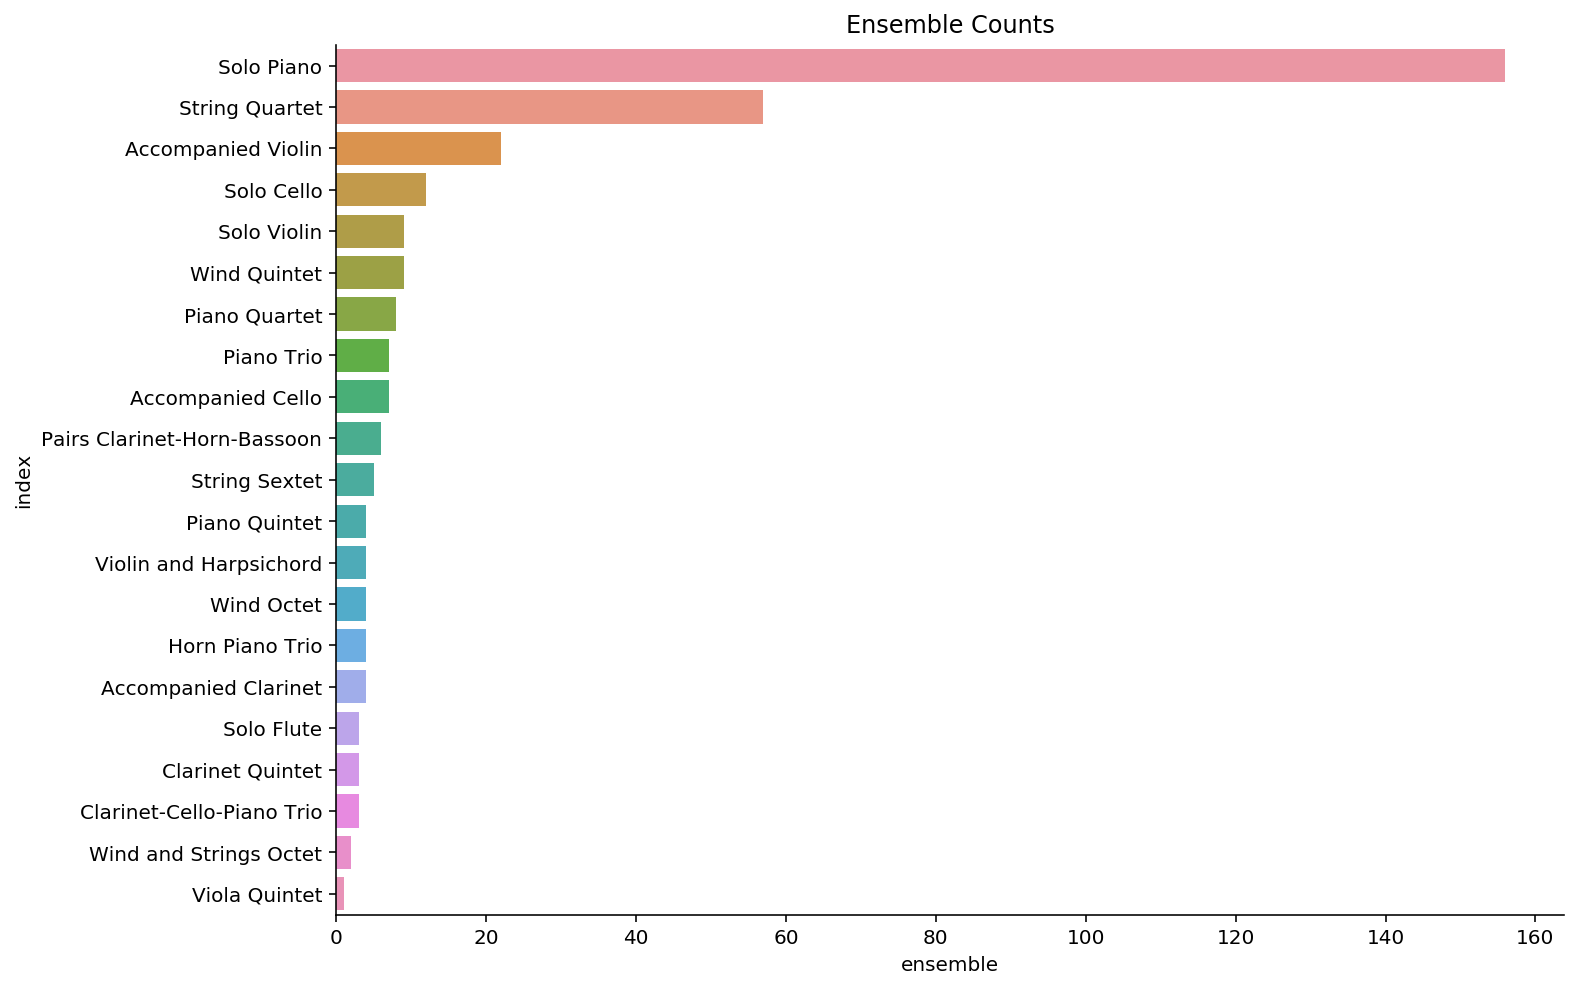

In [12]:
# Ensemble count plot
ensembles = pd.DataFrame(metadata.ensemble.value_counts())
ensembles.reset_index(inplace = True)
fig, ax = plt.subplots(figsize=(11,8))
sns.barplot(ax=ax,x='ensemble',y="index",data=ensembles).set_title('Ensemble Counts')
sns.despine()
plt.show()

#### Observation : Solo Piano is the most common instrument while Viola Quintet Ensemble is rare 

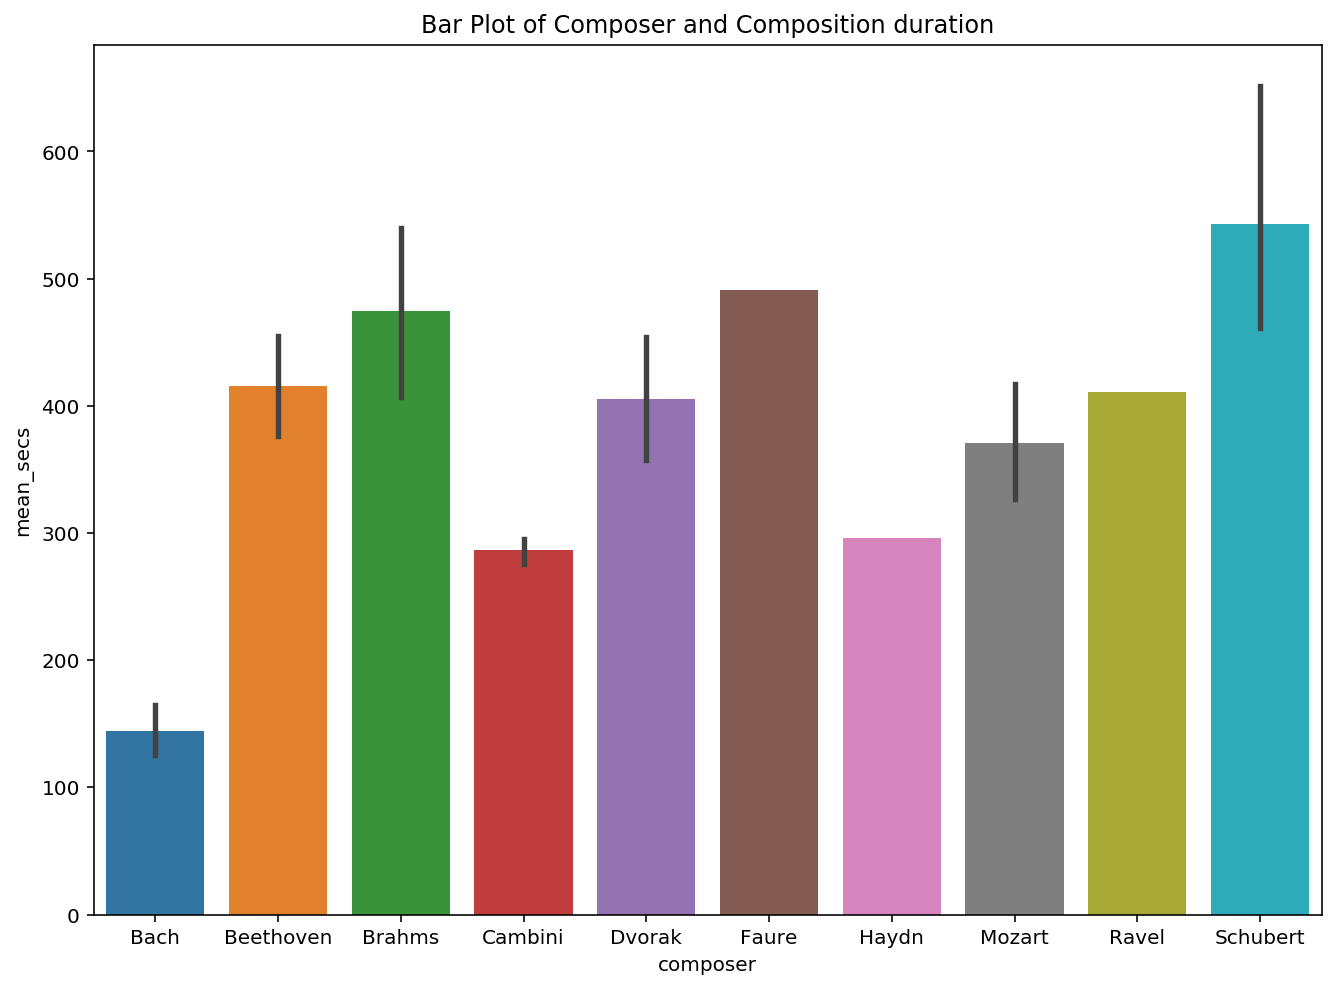

In [13]:
#BarPlot of composer and composition mean duration
m1 = metadata.groupby(['composer','composition']).agg(mean_secs=('seconds','mean'))
m1= m1.reset_index()
dims = (11,8)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(ax=ax,x="composer",y="mean_secs",data=m1).set_title('Bar Plot of Composer and Composition duration')
plt.show()

#### Observation : Schubert has one of the longest composition durations

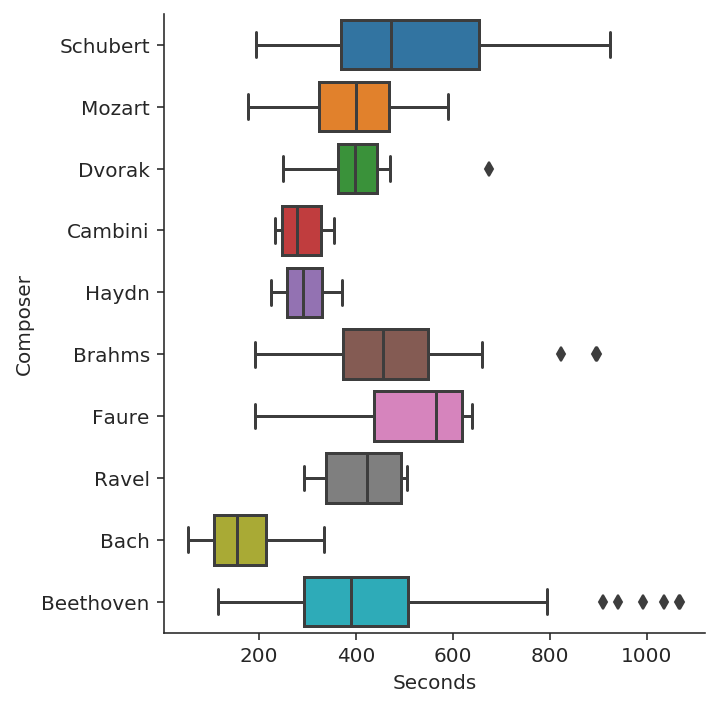

In [14]:
#A box plot shows distribution of movement durations
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="seconds", y="composer", data=metadata, kind="box")
    g.set_axis_labels("Seconds", "Composer")

plt.show()

#### Observation : Schubert and Beethoven has one of the longer movement durations. Beethoven has a number of outliers.

#### Haydn and Cambini have relatively shorter movement durations

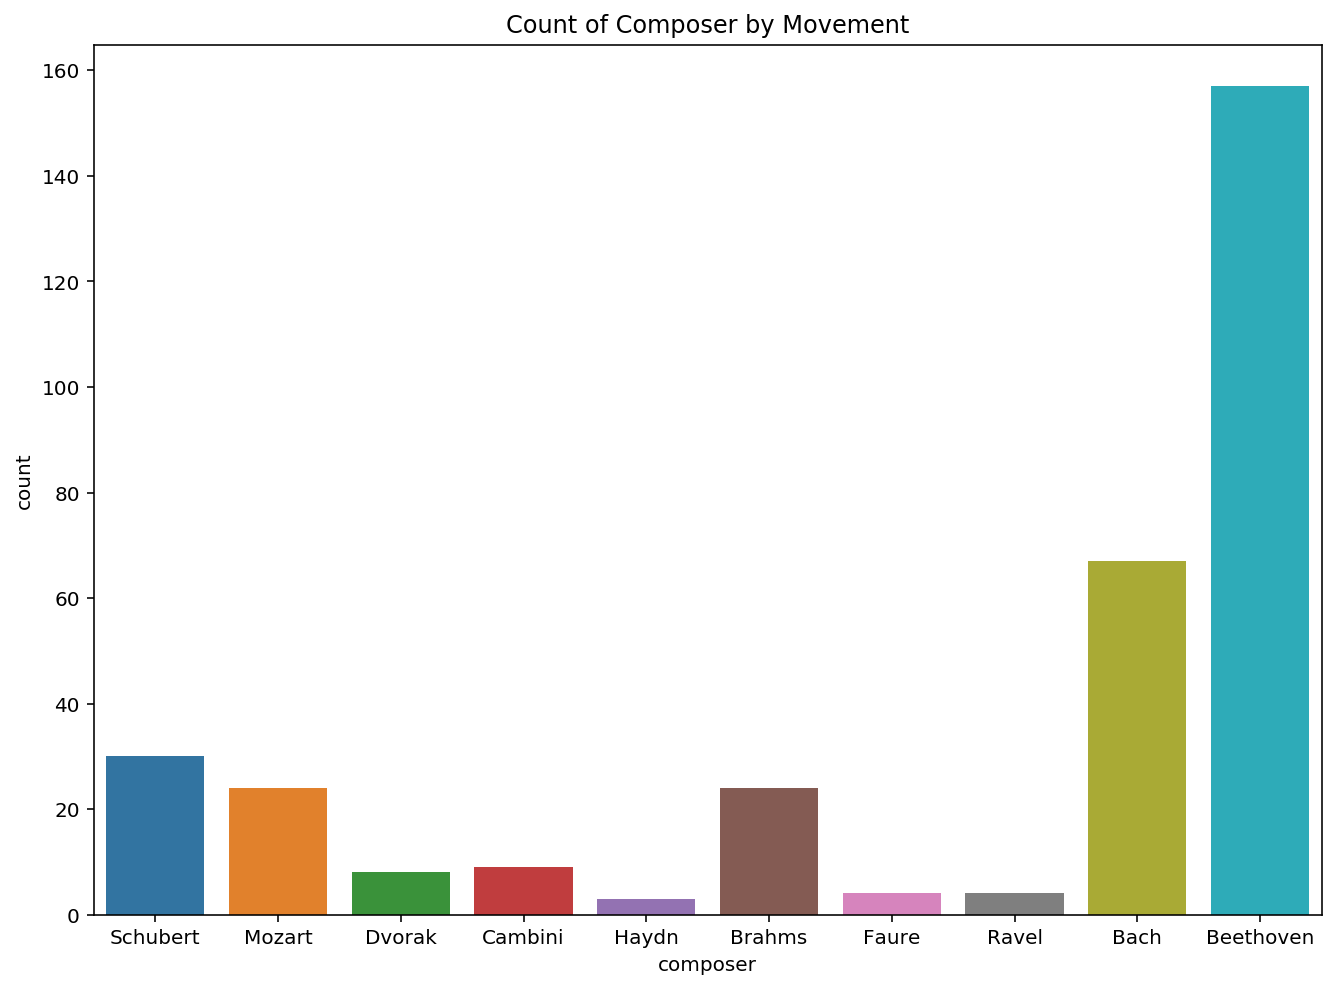

In [15]:
# Plot Count of Movements per Composer in Dataset

plt.figure(figsize=(11,8))
sns.countplot(x="composer", data=metadata).set_title('Count of Composer by Movement')
plt.show()

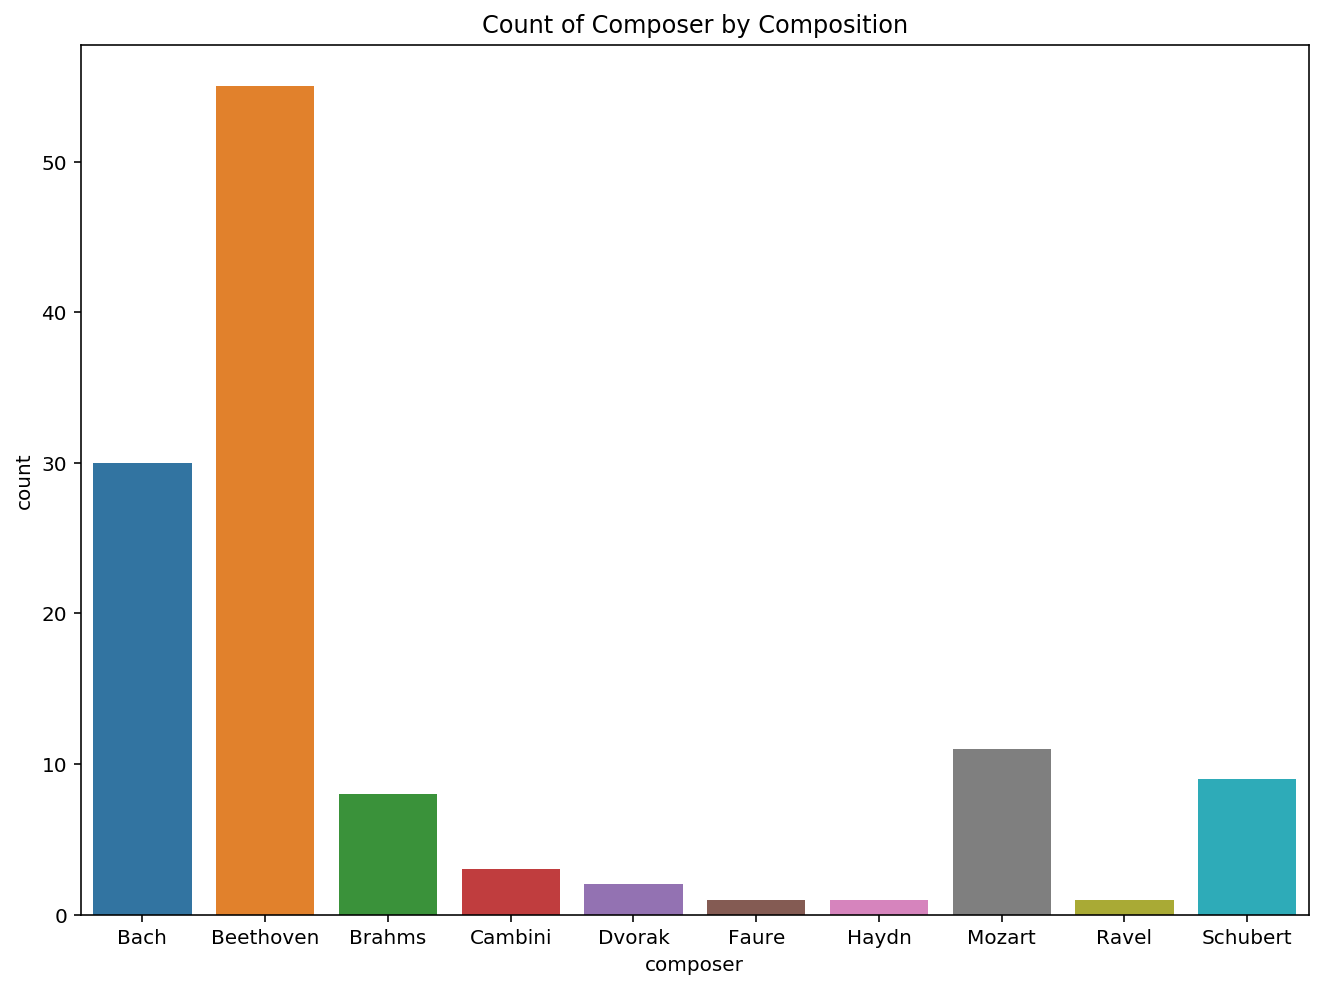

In [16]:
m2 = metadata.groupby(['composer','composition']).count()
m2= m2.reset_index()
m2 =m2[["composer","composition"]]
plt.figure(figsize=(11,8))
sns.countplot(x="composer", data=m2).set_title('Count of Composer by Composition')
plt.show()

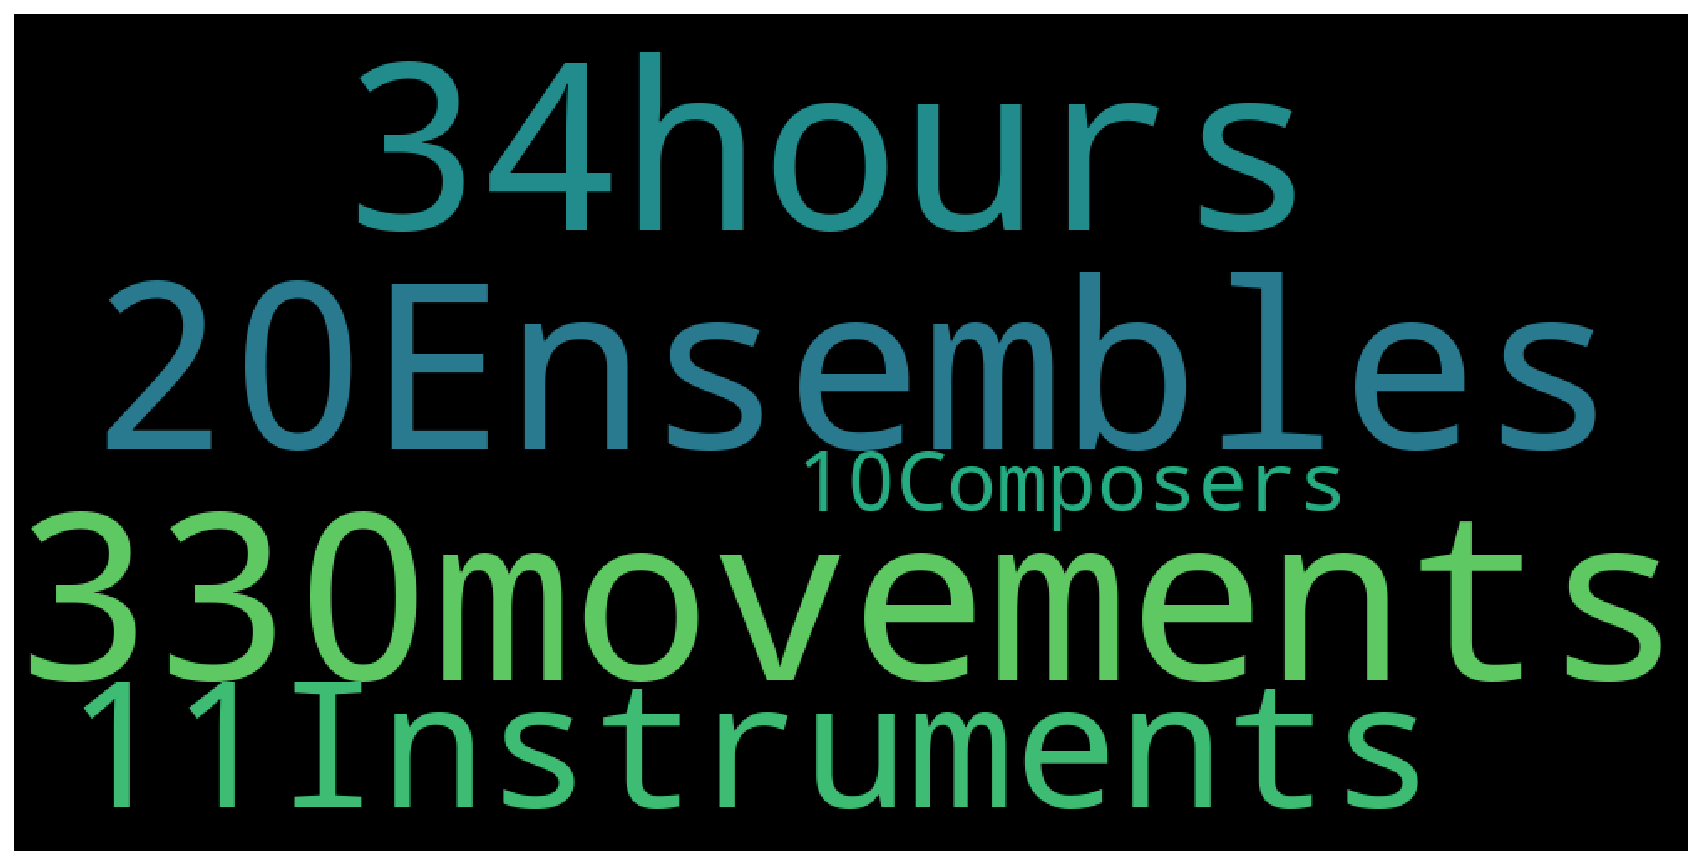

In [18]:
my_list=["330movements", "34hours", "20Ensembles", "11Instruments", "10Composers"]
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

## Exploration of MIDI Data using Music21 Library

MIDI Files contain attributes on pitch, timing and velocity of notes and these are numbers between 0 and 127.

The music dataset is large at 21 gigabytes and is too large to upload to github. We uploaded it to google drive and mounted the data on a Google Collab notebook in order to extract the data features.

The raw file location references the google drive file locations.

### Extract the Piano Instrument Attributes of every Song 

In [ ]:
#Try parsing all MIDI files and returning an array of notes for piano

#First define function to read MIDI files
def read_midi(file):
    """
    This function takes a midi file as an input, parses the midi file into 
    separate parts, and then for any piano parts, returns an array of the notes 
    contained within the part, breaking chords down into individual notes
    """
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)


    #Looping over all the instruments
    if s2 is not None: 
      for part in s2.parts:
          
          #select elements of only piano
          if 'Piano' in str(part): 
          
              notes_to_parse = part.recurse() 
        
              #finding whether a particular element is note or a chord
              for element in notes_to_parse:
                  
                  #note
                  if isinstance(element, note.Note):
                      notes.append(str(element.pitch))
                  
                  #chord
                  elif isinstance(element, chord.Chord):
                      notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
#specify the path
path='/content/drive/My Drive/w207_dataset/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file for piano array
notes_array_piano = np.array([read_midi(path+i) for i in files])

#notes_array_piano now contains one element for each midi file, 

In [ ]:
notes_ = [element for note_ in notes_array_piano for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

#### Output of print statement for piano unique notes

416

In [ ]:
#computing frequency of each note
freq = dict(Counter(notes_))


#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))
plt.xlabel('notes')
plt.ylabel('count')
plt.title('Piano Note Frequency')

#plot
plt.hist(no)


Histogram of Piano Note Frequency (Y-axis = Frequency , X-axis = Pitch)


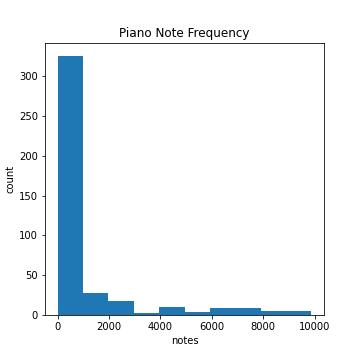

In [1]:
from IPython.display import Image
print('Histogram of Piano Note Frequency (Y-axis = Frequency , X-axis = Pitch)')
Image(filename='../data/pianonotefreq.png', width=400)

#### Observation : Lower note pitches are more frequently played

### Extract the Violin Instrument Attributes of every Song 

In [ ]:
#Try parsing all MIDI files and returning an array of notes for piano

#First define function to read MIDI files
def read_midi(file, inst):
    """
    This function takes a midi file as an input, parses the midi file into 
    separate parts, and then for any piano parts, returns an array of the notes 
    contained within the part, breaking chords down into individual notes
    """
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)


    #Looping over all the instruments
    if s2 is not None: 
      for part in s2.parts:
          
          #select elements of only violin
          if inst in str(part): 
          
              notes_to_parse = part.recurse() 
        
              #finding whether a particular element is note or a chord
              for element in notes_to_parse:
                  
                  #note
                  if isinstance(element, note.Note):
                      notes.append(str(element.pitch))
                  
                  #chord
                  elif isinstance(element, chord.Chord):
                      notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
inst = 'Violin'

#specify the path
path='/content/drive/My Drive/w207_dataset/'


#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file for piano array
notes_array_violin = np.array([read_midi(path+i, inst) for i in files])

#notes_array_violin now contains one element for each midi file, 

In [ ]:
notes_ = [element for note_ in notes_array_violin for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

#### Output of print statement for violin unique notes

270

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

Histogram of Violin Note Frequency (Y-axis = Frequency , X-axis = Pitch)


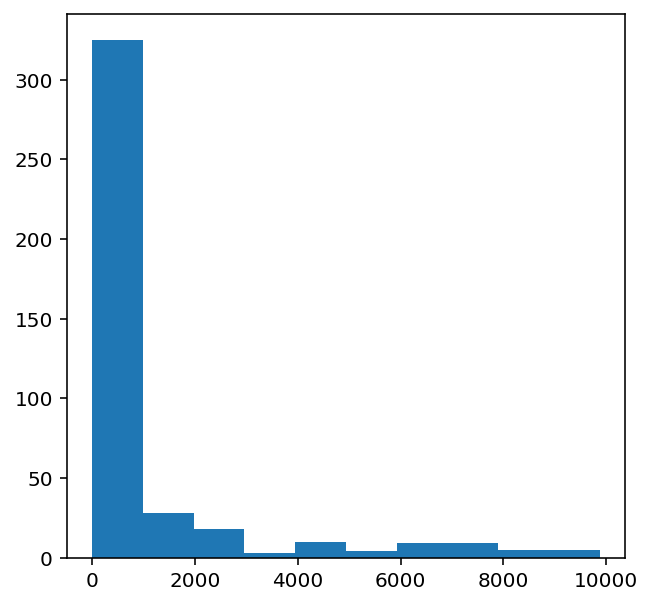

In [27]:
from IPython.display import Image
print('Histogram of Violin Note Frequency (Y-axis = Frequency , X-axis = Pitch)')
Image(filename='../data/plot7.png', width=400)

#### Observation : Lower note pitches are more frequently played

### Extract the Clarinet Instrument Attributes of every Song 

In [ ]:
inst = 'Clarinet'

#specify the path
path='/content/drive/My Drive/w207_dataset/'


#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file for piano array
notes_array_clarinet = np.array([read_midi(path+i, inst) for i in files])

#notes_array_clarinet now contains one element for each midi file, 

In [ ]:
notes_ = [element for note_ in notes_array_clarinet for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

Histogram of Clarinet Note Frequency (Y-axis = Frequency , X-axis = Pitch) 


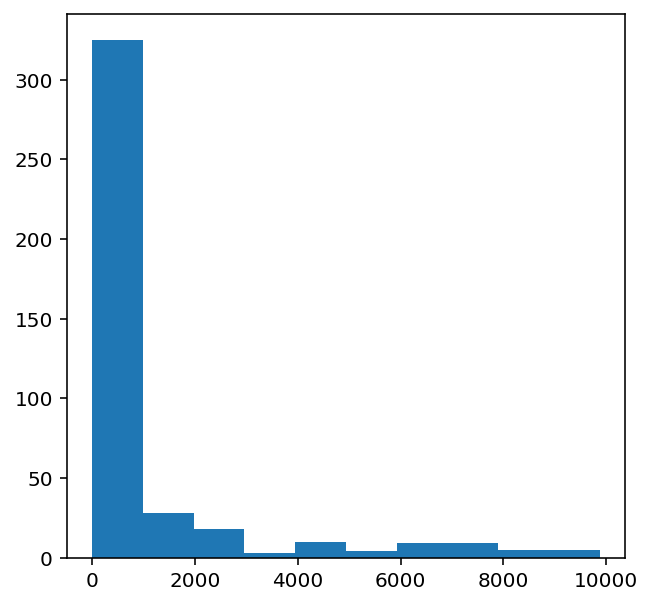

In [28]:
from IPython.display import Image
print('Histogram of Clarinet Note Frequency (Y-axis = Frequency , X-axis = Pitch) ')
Image(filename='../data/plot8.png', width=400)

#### Observation : Lower note pitches are more frequently played

### Correlation Heatmap of exported WAV Spectral features

In [72]:
metadata = pd.read_csv('C:/Users/Zhuang/Documents/Berkeley Program/W207 Machine Learning/Final Project/musicnet_metadata.csv',index_col=0)

train_wav = pd.read_csv('C:/Users/Zhuang/Documents/Berkeley Program/W207 Machine Learning/Final Project/df_train_wav_consolidated.csv',index_col=0)
test_wav = pd.read_csv('C:/Users/Zhuang/Documents/Berkeley Program/W207 Machine Learning/Final Project/df_test_wav_finc.csv',index_col=0)


In [73]:
#Make a copy of the metadata
meta_data_copy = metadata.copy(deep=True)
meta_data_copy.reset_index(inplace=True)
#Rename column name
meta_data_copy = meta_data_copy.rename(columns = {'id':'filename'})

merged_train_data = pd.merge(train_wav , meta_data_copy , on="filename")
merged_train_data = merged_train_data.drop(["composer", "composition", "movement","source","transcriber","catalog_name"], axis=1)

merged_test_data = pd.merge(test_wav , meta_data_copy , on="filename")
merged_test_data = merged_test_data.drop(["composer", "composition", "movement","source","transcriber","catalog_name"], axis=1)


In [74]:
#Get list of unique ensembles
ens_list = merged_train_data['ensemble'].unique()
ens_list

array(['Piano Quintet', 'Solo Piano', 'Piano Trio', 'Viola Quintet',
       'String Quartet', 'Clarinet Quintet',
       'Pairs Clarinet-Horn-Bassoon', 'Wind Quintet', 'Accompanied Cello',
       'Accompanied Clarinet', 'Wind and Strings Octet', 'String Sextet',
       'Piano Quartet', 'Horn Piano Trio', 'Solo Violin', 'Solo Flute',
       'Solo Cello', 'Violin and Harpsichord',
       'Clarinet-Cello-Piano Trio', 'Accompanied Violin', 'Wind Octet'],
      dtype=object)

In [75]:
#Map list of unique ensemble names to integer
mapping = {item:i for i, item in enumerate(ens_list)}

merged_train_data["ensemble"] = merged_train_data["ensemble"].apply(lambda x: mapping[x])

merged_test_data["ensemble"] = merged_test_data["ensemble"].apply(lambda x: mapping[x])


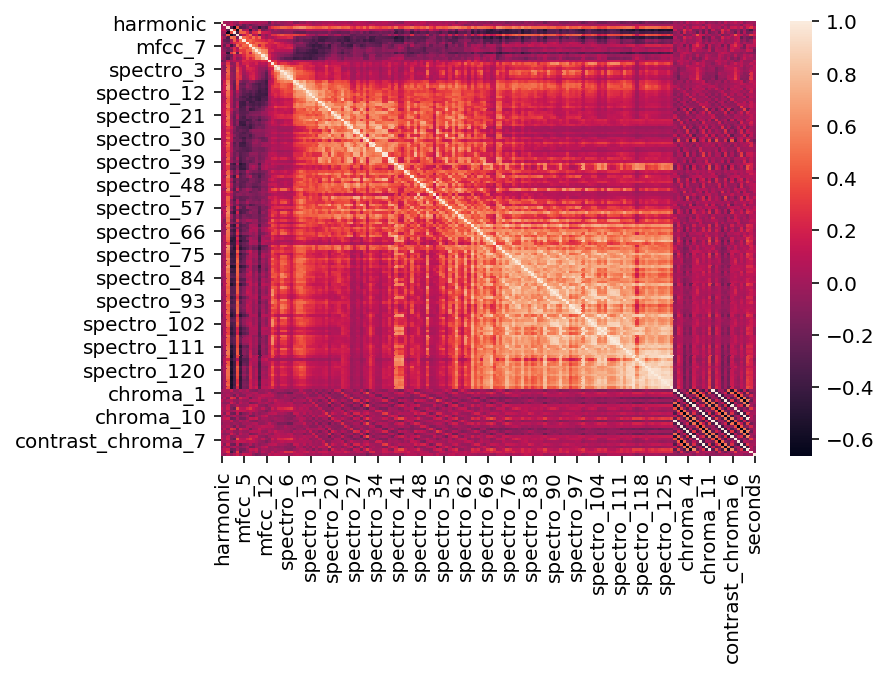

In [76]:
#Correlation Heatmap

# plotting correlation heatmap
dataplot=sns.heatmap(merged_train_data.corr())
  
# displaying heatmap
plt.show()


#### Observation : Based on colors of the heatmap we can tell that a good number of features are highly correlated as per the lighter square in the center of the grid

### Pairwise Correlations of exported WAV Spectral features

In [40]:
#Correlation Pairs Table of WAV Spectral Features

correlation_mat = merged_train_data.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_pairs)

chroma_2            chroma_8             -0.665093
                    contrast_chroma_8    -0.665093
contrast_chroma_8   contrast_chroma_2    -0.665093
contrast_chroma_2   chroma_8             -0.665093
contrast_chroma_8   chroma_2             -0.665093
contrast_chroma_2   contrast_chroma_8    -0.665093
chroma_8            contrast_chroma_2    -0.665093
                    chroma_2             -0.665093
chroma_10           chroma_4             -0.662990
                    contrast_chroma_4    -0.662990
contrast_chroma_10  contrast_chroma_4    -0.662990
contrast_chroma_4   contrast_chroma_10   -0.662990
chroma_4            contrast_chroma_10   -0.662990
contrast_chroma_4   chroma_10            -0.662990
contrast_chroma_10  chroma_4             -0.662990
chroma_4            chroma_10            -0.662990
contrast_chroma_3   chroma_9             -0.658759
contrast_chroma_9   contrast_chroma_3    -0.658759
contrast_chroma_3   contrast_chroma_9    -0.658759
chroma_3            contrast_ch

#### Observation : To see pairwise correlations, plot table above. We can see that spectro features are highly correlated with each other and so are chroma and constrast chroma.

### Scatter Matrix plot of MIDI Engineered Features

#### Scatter Plots and Density Distributions  

In [42]:

#Get engineered midi features only 
midi_features = pd.read_csv('../data/midi_features.csv',index_col=0)

#Get metadata
metadata=pd.read_csv('../data/musicnet_metadata.csv')


In [43]:

#Rename column name 

midi_features = midi_features.rename(columns = {'file_name':'filename'})
metadata = metadata.rename(columns = {'id':'filename'})

#Merge Metadata and MIDI Data only

#For original midi
merged_midi_data = pd.merge(midi_features , metadata , on="filename")
merged_midi_data = merged_midi_data.drop(["composer", "composition", "movement","source","transcriber","catalog_name"], axis=1)

#Get list of unique ensembles
ens_list = merged_midi_data['ensemble'].unique()
#Map list of unique ensemble names to integer
mapping = {item:i for i, item in enumerate(ens_list)}

#Map list of unique ensemble names to integer

#For original midi
merged_midi_data["ensemble"] = merged_midi_data["ensemble"].apply(lambda x: mapping[x])

#Drop filename
merged_midi_data= merged_midi_data.drop(['filename'],axis=1)



Plot Scatter Matrix 1 of :
X Features = Unique instruments, notes, number of notes
Y = Ensemble Type


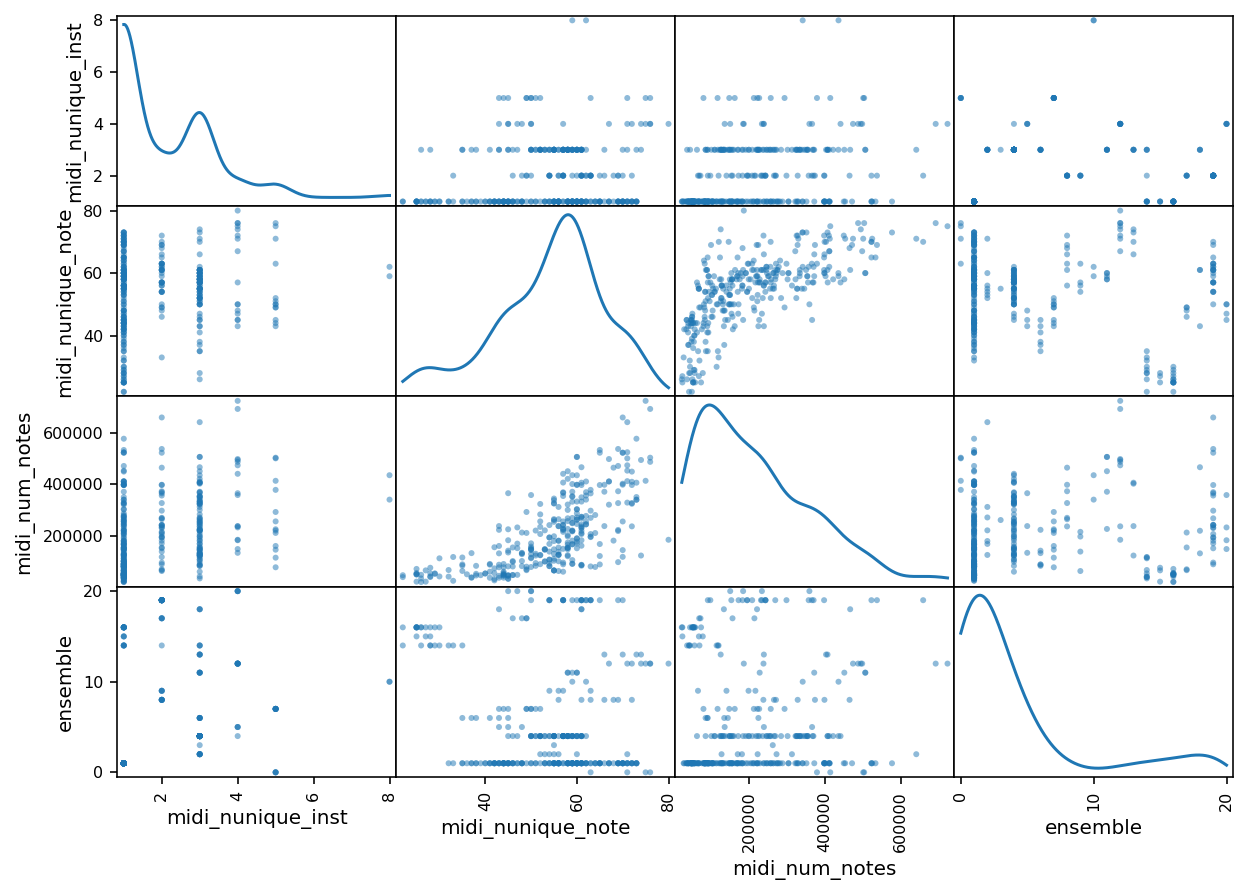

In [97]:
#Plot Scatter Matrix of  (X = Number of unique instruments, Number of Unique notes, Number of notes) and (Y = Ensemble)
#Diagonal is Density Distribution, Other cells show scatter plots

sm = scatter_matrix(merged_midi_data.iloc[:,np.r_[:3,9]] ,figsize  = [10, 7], diagonal ='kde')

print('Plot Scatter Matrix 1 of :')
print('X Features = Unique instruments, notes, number of notes')
print('Y = Ensemble Type')
plt.show()

#### Observation : It is reasonable that there is some correlation between number of unique notes and number of notes based on the scatter plots. We can also see that the distribution of number of notes per song, distribution of ensemble types and distribution of number of unique instruments per song is imbalanced.

Plot Scatter Matrix 2 of :
X Features = Minimum Note Pitch, Second Quintile Note Pitch, Median Note Pitch
Y = Ensemble Type


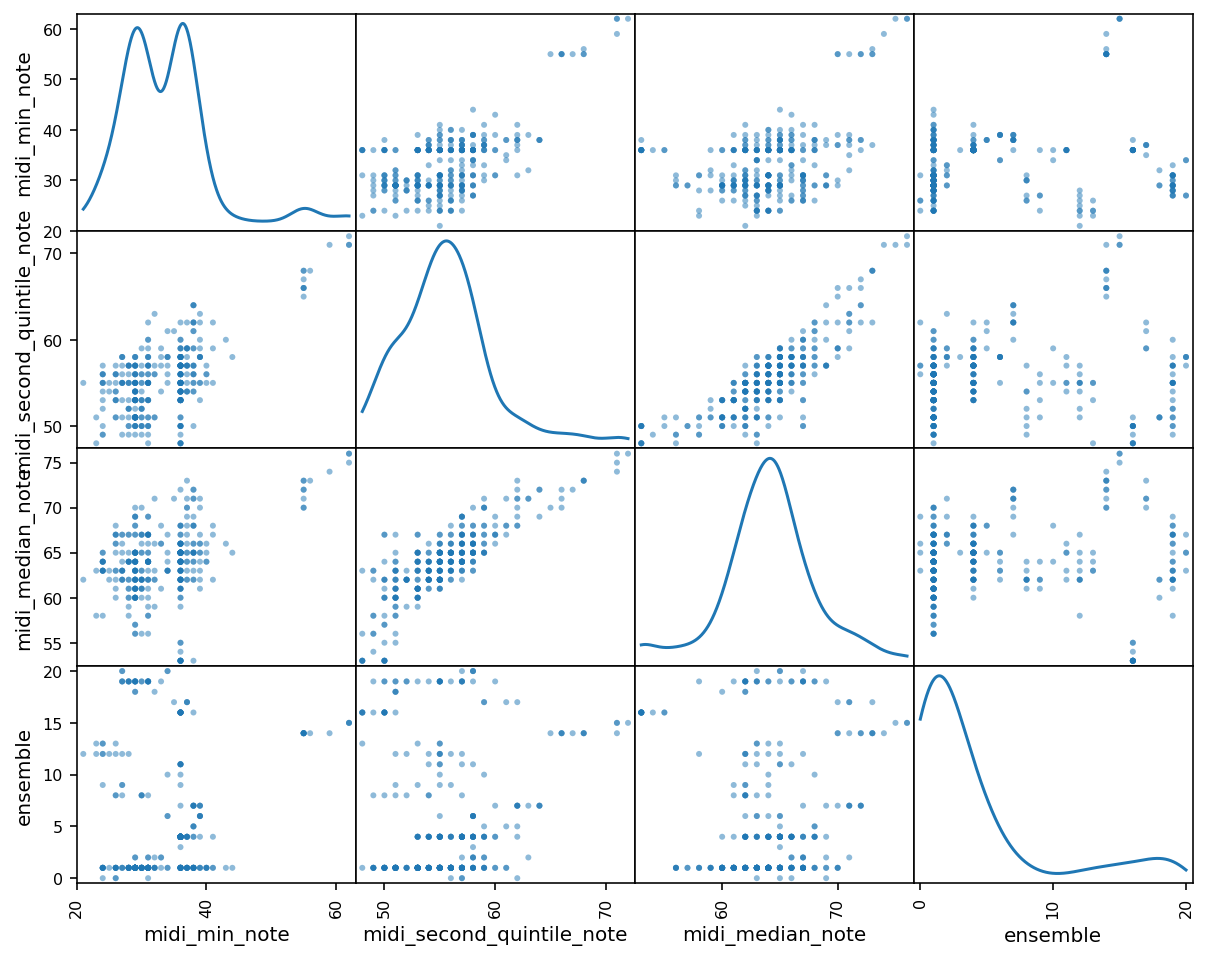

In [98]:
#Plot Scatter Matrix of  (X = Minimum Note Pitch, Second Quintile Note Pitch, Median Note Pitch) and (Y = Ensemble)
#Diagonal is Density Distribution, Other cells show scatter plots

sm = scatter_matrix(merged_midi_data.iloc[:,np.r_[3:6,9]] ,figsize  = [10, 8], diagonal ='kde')

print('Plot Scatter Matrix 2 of :')
print('X Features = Minimum Note Pitch, Second Quintile Note Pitch, Median Note Pitch')
print('Y = Ensemble Type')
plt.show()

#### Observation : It makes sense that the pitch of the median note and second quintile note is quite consistent and normally distributed.

Plot Scatter Matrix 3 of :
X Features = Fourth Quintile Note pitch, Max note pitch, Average Number of notes, Seconds
Y = Ensemble


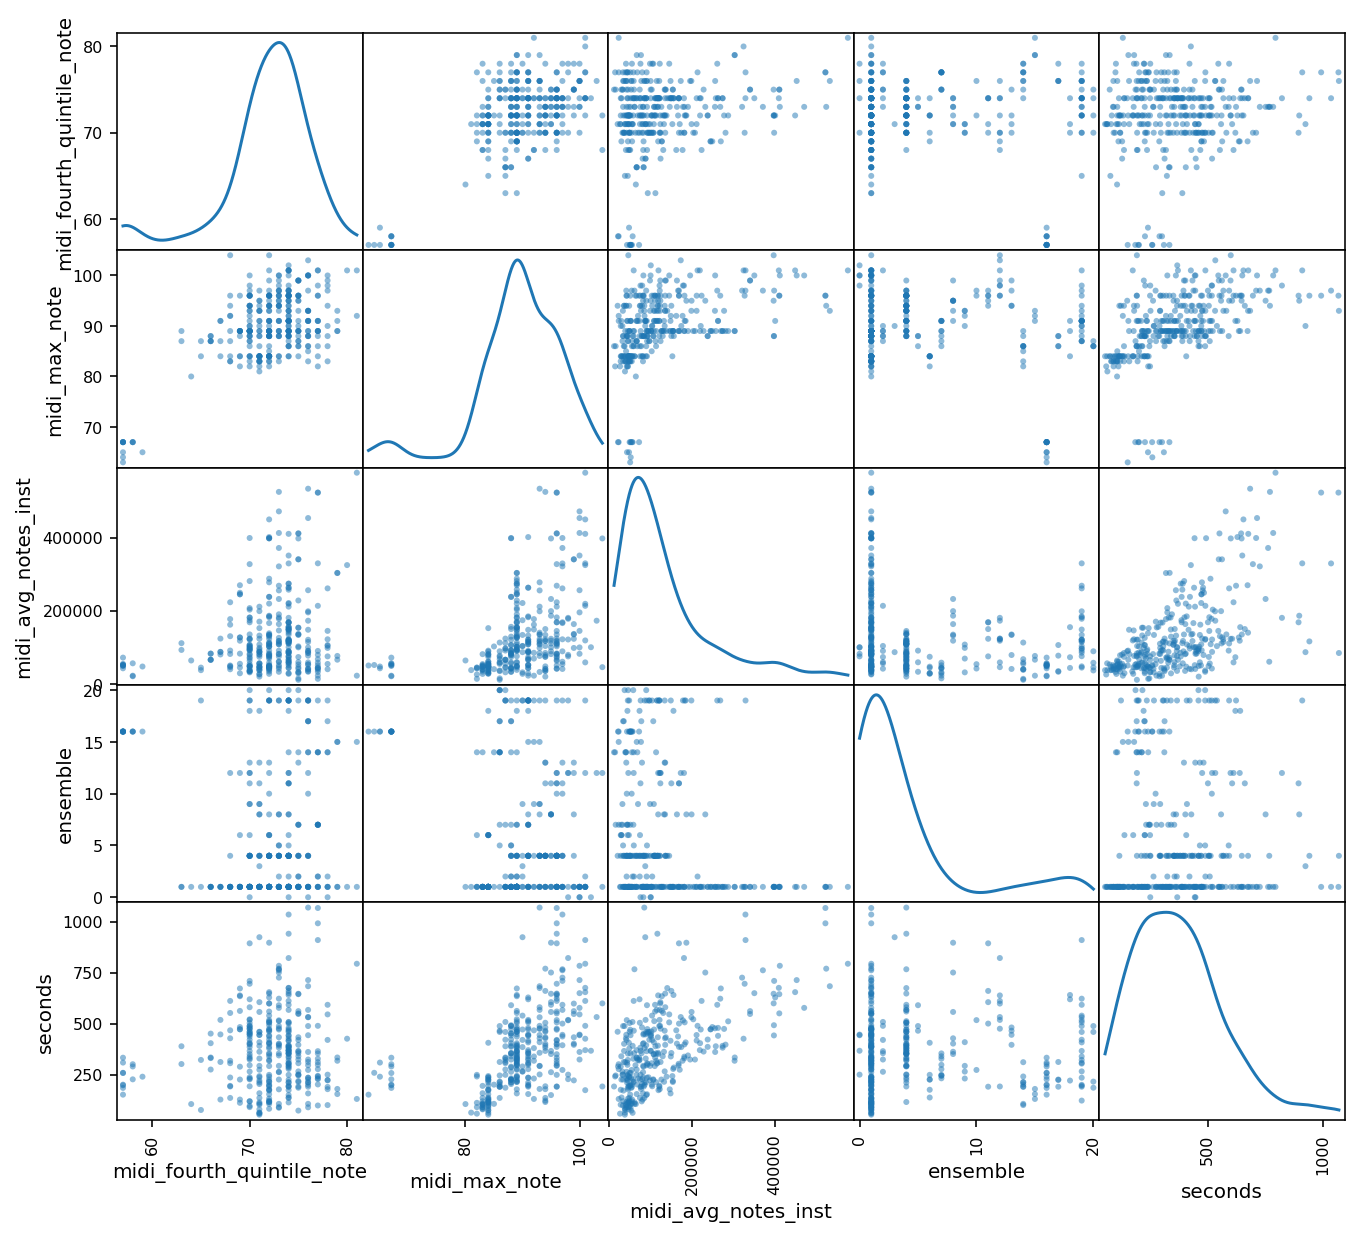

In [96]:
#Plot Scatter Matrix of  (X = Fourth Quintile Note pitch, Max note pitch, Average Number of notes, Seconds) and (Y = Ensemble)
#Diagonal is Density Distribution, Other cells show scatter plots

sm = scatter_matrix(merged_midi_data.iloc[:,np.r_[6:11]] ,figsize  = [11, 10], diagonal ='kde')

print('Plot Scatter Matrix 3 of :')
print('X Features = Fourth Quintile Note pitch, Max note pitch, Average Number of notes, Seconds')
print('Y = Ensemble')
plt.show()

#### Observation : Most movements are below 500 seconds. It makes sense that there is some correlation between average number of number of notes played per instrument and duration of the movement.